# EDA and Cleaning

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB

In [116]:
# Importing my 01_Scraping notebook files

fitness1 = pd.read_csv('Data/fitness_scrape_1.csv')
fitness2 = pd.read_csv('Data/fitness_scrape_2.csv')
fitness3 = pd.read_csv('Data/fitness_scrape_3.csv')
fitnessmonth = pd.read_csv('Data/fitness_scrape_month.csv')
fitnessyear = pd.read_csv('Data/fitness_scrape_year.csv')
fitnessnew = pd.read_csv('Data/fitness_scrape_new.csv')
fitnesscontroversial = pd.read_csv('Data/fitness_scrape_controversial.csv')

In [117]:
nutrition1 = pd.read_csv('Data/nutrition_scrape_1.csv')
nutrition2 = pd.read_csv('Data/nutrition_scrape_2.csv')
nutrition3 = pd.read_csv('Data/nutrition_scrape_3.csv')
nutritionmonth = pd.read_csv('Data/nutrition_scrape_month.csv')
nutritionyear = pd.read_csv('Data/nutrition_scrape_year.csv')
nutritionnew = pd.read_csv('Data/nutrition_scrape_new.csv')
nutritioncontroversial = pd.read_csv('Data/nutrition_scrape_controversial.csv')

In [118]:
# combined fitness and nutrition scrapes
# I decided to only use one of my 'top' scrapes, because after accidentally overwriting my original scrapes, the three after were too similar.
fitness = pd.concat([fitness3, fitnessmonth, fitnessyear, fitnessnew, fitnesscontroversial])
nutrition = pd.concat([nutrition3, nutritionmonth, nutritionyear, nutritionnew, nutritioncontroversial])

In [119]:
# adding columns to my dataframes that shows the subreddit of origin for use as my y variable during modeling and predicting
fitness['subreddit'] = 'fitness'
nutrition['subreddit'] = 'nutrition'

In [120]:
fitness.head()

,Title,ID,Author,URL,Score,Comment Count,Created,subreddit
0,Things I Wish I Knew 8 Years Ago,4pl3yc,iamaliftaholic,https://www.reddit.com/r/Fitness/comments/4pl3...,19495,655,1.466744e+09,fitness
1,How to do PULL UPS properly and how to do your...,7ye7r2,Antranik,https://www.reddit.com/r/Fitness/comments/7ye7...,14127,516,1.518960e+09,fitness
2,We over at r/flexibility created a new full-bo...,92bhaj,tykato,https://www.reddit.com/r/Fitness/comments/92bh...,14059,329,1.532689e+09,fitness
3,"Smoking increases risk of lung cancer 2,500%. ...",3qft9h,duffstoic,https://www.reddit.com/r/Fitness/comments/3qft...,13341,1216,1.445964e+09,fitness
4,"Finally hit 213lbs lost, then got under 200lbs...",7nrqkz,abraxsis,https://www.reddit.com/r/Fitness/comments/7nrq...,12988,541,1.514948e+09,fitness


In [121]:
fitness.shape

(3666, 8)

In [122]:
nutrition.shape

(4547, 8)

In [123]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [124]:
# creating a function to create a new column based on my 'Title' column, but tokenized, 
# lowercase, removed punctuation, removed stop words and lemmatized
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

In [125]:
fitness['processed_title'] = fitness['Title'].apply(preprocess_text)

In [126]:
fitness.head()

,Title,ID,Author,URL,Score,Comment Count,Created,subreddit,processed_title
0,Things I Wish I Knew 8 Years Ago,4pl3yc,iamaliftaholic,https://www.reddit.com/r/Fitness/comments/4pl3...,19495,655,1.466744e+09,fitness,"[thing, wish, knew, year, ago]"
1,How to do PULL UPS properly and how to do your...,7ye7r2,Antranik,https://www.reddit.com/r/Fitness/comments/7ye7...,14127,516,1.518960e+09,fitness,"[pull, ups, properly, first, pullup, ca]"
2,We over at r/flexibility created a new full-bo...,92bhaj,tykato,https://www.reddit.com/r/Fitness/comments/92bh...,14059,329,1.532689e+09,fitness,"[created, new, stretching, routine, take, minu..."
3,"Smoking increases risk of lung cancer 2,500%. ...",3qft9h,duffstoic,https://www.reddit.com/r/Fitness/comments/3qft...,13341,1216,1.445964e+09,fitness,"[smoking, increase, risk, lung, cancer, bacon,..."
4,"Finally hit 213lbs lost, then got under 200lbs...",7nrqkz,abraxsis,https://www.reddit.com/r/Fitness/comments/7nrq...,12988,541,1.514948e+09,fitness,"[finally, hit, lost, got, square, inch, skin, ..."


In [127]:
# creating yet another column that is a string of my tokens so I can use count vectorizer on them
fitness['processed_title_joined'] = fitness['processed_title'].apply(lambda x: ' '.join(x))

In [128]:
fitness.head()

,Title,ID,Author,URL,Score,Comment Count,Created,subreddit,processed_title,processed_title_joined
0,Things I Wish I Knew 8 Years Ago,4pl3yc,iamaliftaholic,https://www.reddit.com/r/Fitness/comments/4pl3...,19495,655,1.466744e+09,fitness,"[thing, wish, knew, year, ago]",thing wish knew year ago
1,How to do PULL UPS properly and how to do your...,7ye7r2,Antranik,https://www.reddit.com/r/Fitness/comments/7ye7...,14127,516,1.518960e+09,fitness,"[pull, ups, properly, first, pullup, ca]",pull ups properly first pullup ca
2,We over at r/flexibility created a new full-bo...,92bhaj,tykato,https://www.reddit.com/r/Fitness/comments/92bh...,14059,329,1.532689e+09,fitness,"[created, new, stretching, routine, take, minu...",created new stretching routine take minute inc...
3,"Smoking increases risk of lung cancer 2,500%. ...",3qft9h,duffstoic,https://www.reddit.com/r/Fitness/comments/3qft...,13341,1216,1.445964e+09,fitness,"[smoking, increase, risk, lung, cancer, bacon,...",smoking increase risk lung cancer bacon increa...
4,"Finally hit 213lbs lost, then got under 200lbs...",7nrqkz,abraxsis,https://www.reddit.com/r/Fitness/comments/7nrq...,12988,541,1.514948e+09,fitness,"[finally, hit, lost, got, square, inch, skin, ...",finally hit lost got square inch skin removed ...


In [129]:
nutrition['processed_title'] = nutrition['Title'].apply(preprocess_text)

In [130]:
# Creating yet another column that turns my list of tokens into a string for my models to use

nutrition['processed_title_joined'] = nutrition['processed_title'].apply(lambda x: ' '.join(x))

In [131]:
nutrition.head()

,Title,ID,Author,URL,Score,Comment Count,Created,subreddit,processed_title,processed_title_joined
0,I think until basic nutrition is not taught in...,kw68ae,mayermail1977,https://www.reddit.com/r/nutrition/comments/kw...,2486,328,1.610503e+09,nutrition,"[think, basic, nutrition, taught, school, obes...",think basic nutrition taught school obesity pu...
1,Ireland's Supreme Court Rules Sandwiches in Su...,j2npi7,Bluest_waters,https://www.reddit.com/r/nutrition/comments/j2...,2072,120,1.601478e+09,nutrition,"[ireland, supreme, court, rule, sandwich, subw...",ireland supreme court rule sandwich subway sug...
2,A study on nutrients in food concluded that we...,uis73l,high_on_cosmos,https://www.reddit.com/r/nutrition/comments/ui...,1917,161,1.651736e+09,nutrition,"[study, nutrient, food, concluded, would, eat,...",study nutrient food concluded would eat orange...
3,Just a reminder: Nutella is a garbage food.,bm4p24,imdjay,https://www.reddit.com/r/nutrition/comments/bm...,1727,271,1.557319e+09,nutrition,"[reminder, nutella, garbage, food]",reminder nutella garbage food
4,Visualize your ancestors eating your food,ipw6xf,pbw,https://www.reddit.com/r/nutrition/comments/ip...,1597,104,1.599711e+09,nutrition,"[visualize, ancestor, eating, food]",visualize ancestor eating food


In [132]:
cvec = CountVectorizer()

In [133]:
cvec.fit(fitness['processed_title_joined'])

CountVectorizer()

In [134]:
fitness_cvec = cvec.transform(fitness['processed_title_joined'])

In [135]:
fitness_transformed = fitness_cvec.toarray()

In [136]:
feature_names = cvec.get_feature_names_out()

In [137]:
fitness_df = pd.DataFrame(fitness_transformed, columns=feature_names)

In [138]:
fittop20 = fitness_df.sum().sort_values(ascending=False).head(20)
fittop20

question     951
thread       917
daily        800
simple       793
gym          311
year         240
story        144
day          144
saturday     142
rant         134
victory      132
physique     132
sunday       131
phriday      127
wednesday    127
stupid       126
weight       124
month        123
monday       123
weekly       123
dtype: int64

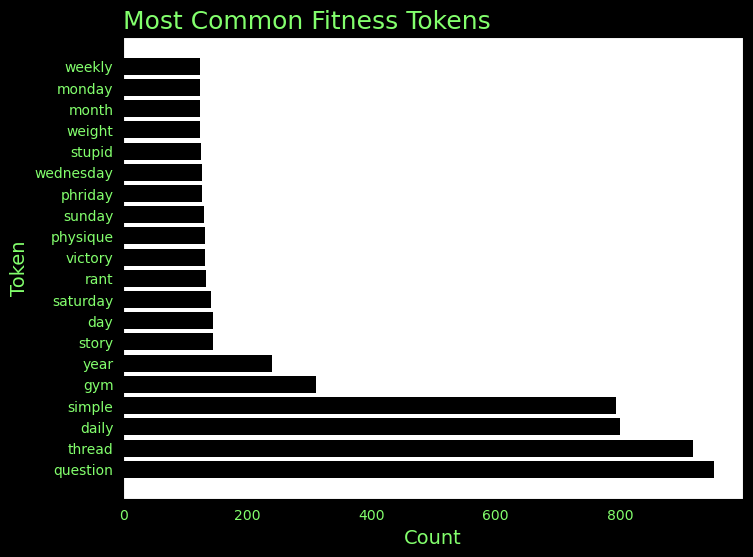

In [139]:
plt.figure(figsize=(8,6), facecolor='black')
ax = plt.axes()
#ax.set_facecolor("#83ff6d")
plt.barh(fittop20.index, fittop20, color='black')
plt.title('Most Common Fitness Tokens', size=18, loc='left', color='#83ff6d')
plt.xlabel('Count', size=14, color='#83ff6d')
plt.xticks(color='#83ff6d')
plt.ylabel('Token', size=14, color='#83ff6d')
plt.yticks(color='#83ff6d')
plt.savefig('images/fitness_tokens.png', dpi=192);

In [140]:
cvec.fit(nutrition['processed_title_joined'])

CountVectorizer()

In [141]:
nutrition_cvec = cvec.transform(nutrition['processed_title_joined'])

In [142]:
nutrition_transformed = nutrition_cvec.toarray()

In [143]:
feature_names = cvec.get_feature_names_out()

In [144]:
nutrition_df = pd.DataFrame(nutrition_transformed, columns=feature_names)

In [145]:
nuttop20 = nutrition_df.sum().sort_values(ascending=False).head(20)
nuttop20

food         577
protein      381
diet         352
healthy      334
nutrition    268
eat          264
calorie      263
sugar        262
fat          247
eating       221
bad          216
good         185
much         176
health       166
day          155
vitamin      154
high         146
best         137
fruit        136
meat         136
dtype: int64

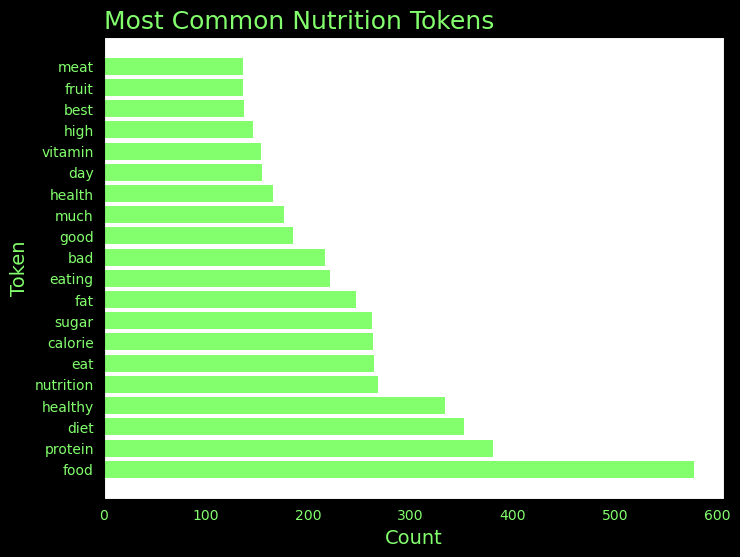

In [146]:
plt.figure(figsize=(8,6), facecolor='black')
plt.barh(nuttop20.index, nuttop20, color='#83ff6d')
plt.title('Most Common Nutrition Tokens', size=18, loc='left', color='#83ff6d')
plt.xlabel('Count', size=14, color='#83ff6d')
plt.xticks(color='#83ff6d')
plt.ylabel('Token', size=14, color='#83ff6d')
plt.yticks(color='#83ff6d')
plt.savefig('images/nutrition_tokens.png', dpi=192);

In [147]:
# combining my completed fitness and nutrition dataframes into one larger dataframe for use in modeling predictions

reddit_posts = pd.concat([fitness, nutrition])

In [148]:
reddit_posts.shape

(8213, 10)

In [149]:
reddit_posts.isna().sum()

Title                       0
ID                          0
Author                    641
URL                         0
Score                       0
Comment Count               0
Created                     0
subreddit                   0
processed_title             0
processed_title_joined      0
dtype: int64

We have a chunk of missing authors, which might be due to account deletion. We don't really need this column for our modeling so I'm just going to leave it as is.

I believe with my title column as my X and subreddit column as my y, I will have what I need to answer my classification problem.

In [150]:
reddit_posts.describe()

,Score,Comment Count,Created
count,8213.000000,8213.000000,8.213000e+03
mean,406.538293,190.497017,1.618816e+09
std,1096.289388,278.610019,1.243387e+08
min,0.000000,0.000000,1.243018e+09
25%,2.000000,21.000000,1.546385e+09
50%,23.000000,74.000000,1.687252e+09
75%,184.000000,272.000000,1.711655e+09
max,19495.000000,4279.000000,1.720471e+09


In [151]:
reddit_posts.to_csv('Data/reddit_posts.csv', index=False)

In [152]:
reddit_posts.isna().sum()

Title                       0
ID                          0
Author                    641
URL                         0
Score                       0
Comment Count               0
Created                     0
subreddit                   0
processed_title             0
processed_title_joined      0
dtype: int64